In [1]:
import networkx as nx
import why


**Given the following graph:**

We want to find all valid adjustment sets that blocks all backdoor paths (non-causal association) between variables. 


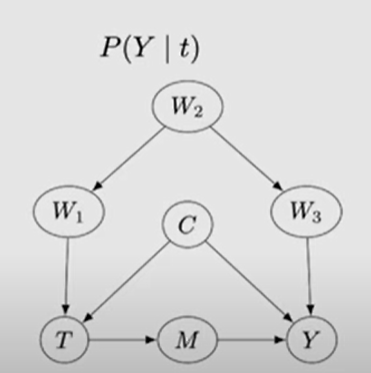





In [2]:
# Creating a DAG this should be the output of the previous module
graph_one = nx.DiGraph() 
graph_one.add_edges_from([('T', 'M'), ('M', 'Y'), ('C', 'T'), ('C', 'Y'), ('W1', 'T'), ('W3', 'Y'), ('W2', 'W1'), ('W2', 'W3')])


In [3]:
adjuster = why.BackdoorAdjustment(graph_one)
print("Condioning on empty set: ",adjuster.is_valid_backdoor_adjustment("T","Y"))
print("Condioning on C only: ",adjuster.is_valid_backdoor_adjustment("T","Y",["C"]))
print("Condioning on C and W1: ",adjuster.is_valid_backdoor_adjustment("T","Y",["C","W1"]))
print("Condioning on C and W1 and W3: ",adjuster.is_valid_backdoor_adjustment("T","Y",["C","W1","W3"]))
print("Condioning on W1 and W3: ",adjuster.is_valid_backdoor_adjustment("T","Y",["W1","W3"]))

print("All valid backdoor adjustment sets are: ",adjuster.get_all_backdoor_adjustment_set("T","Y"))

Condioning on empty set:  False
Condioning on C only:  False
Condioning on C and W1:  True
Condioning on C and W1 and W3:  True
Condioning on W1 and W3:  False
All valid backdoor adjustment sets are:  [('W2', 'C'), ('W1', 'C'), ('C', 'W3'), ('W2', 'W1', 'C'), ('W2', 'C', 'W3'), ('W1', 'C', 'W3'), ('W2', 'W1', 'C', 'W3')]


Second Example we are going to test on:


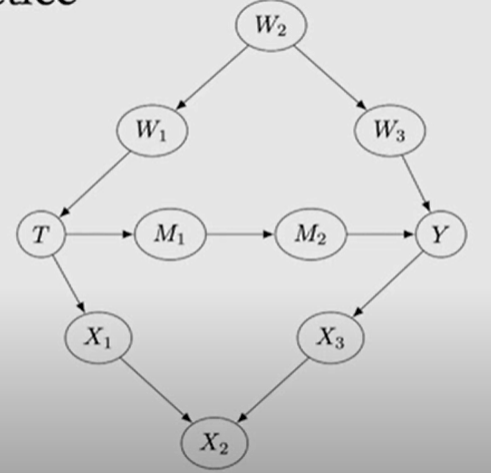

In [4]:
# Creating a DAG this should be the output of the previous module
graph_two = nx.DiGraph() 
graph_two.add_edges_from([('T', 'M1'), ('M1', 'M2'), ('M2', 'Y'), ('T', 'X1'), 
                          ('X1', 'X2'), ('X3', 'X2'), ('Y', 'X3'), ('W2', 'W1'),
                          ('W2', 'W3'),('W1', 'T'),('W3', 'Y')
                        ])

In [5]:
adjuster = why.BackdoorAdjustment(graph_two)
print("Condioning on empty set: ",adjuster.is_valid_backdoor_adjustment("T","Y",[]))
print("Condioning on M1: ",adjuster.is_valid_backdoor_adjustment("T","Y",["M1"]))
print("Condioning on M1 and W2: ",adjuster.is_valid_backdoor_adjustment("T","Y",["M1","W2"]))
print("Condioning on W1 and W3: ",adjuster.is_valid_backdoor_adjustment("T","Y",["W1","W3"]))
print("Condioning on X2 (Collider): ",adjuster.is_valid_backdoor_adjustment("T","Y",["X2"]))

print("All valid backdoor adjustment sets are: ",adjuster.get_all_backdoor_adjustment_set("T","Y"))

Condioning on empty set:  False
Condioning on M1:  False
Condioning on M1 and W2:  True
Condioning on W1 and W3:  True
Condioning on X2 (Collider):  False
All valid backdoor adjustment sets are:  [('W2',), ('W1',), ('W3',), ('W2', 'W1'), ('W2', 'W3'), ('W1', 'W3'), ('W2', 'W1', 'W3')]


 

---



One last challenging example:

It's challenging because although z2 is a collider, it is not one of the descendents of T, so it's a little more challenging and it shows that the algorithm we provided can detect colliders even if they are not in the descendants of the treatment. The correct minimal solution would be an empty set,as conditioning on the collider Z2 will unblock the non-causal path.


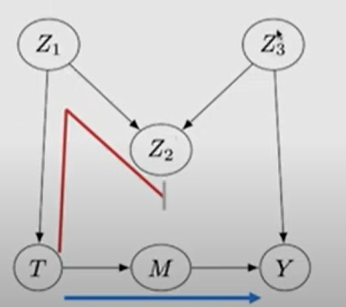

In [6]:
graph_three = nx.DiGraph() 
graph_three.add_edges_from([('T', 'M'), ('M', 'Y'), ('Z1', 'T'), ('Z1', 'Z2'), ('Z3', 'Z2'), ('Z3', 'Y')])


In [7]:
badjust = why.BackdoorAdjustment(graph_three)
print("Condioning on empty set: ",badjust.is_valid_backdoor_adjustment("T","Y",[]))
print("Condioning on Z1: ",badjust.is_valid_backdoor_adjustment("T","Y",["Z1"]))
print("Condioning on Z2: ",badjust.is_valid_backdoor_adjustment("T","Y",["Z2"]))
print("Condioning on Z1 and Z2: ",badjust.is_valid_backdoor_adjustment("T","Y",["Z1","Z2"]))

print("Minimal valid backdoor adjustment sets is: ",badjust.get_all_backdoor_adjustment_set("T","Y")[0])

Condioning on empty set:  True
Condioning on Z1:  True
Condioning on Z2:  False
Condioning on Z1 and Z2:  True
Minimal valid backdoor adjustment sets is:  ()
